In [14]:
!nvidia-smi

Thu May 23 21:28:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.161.08             Driver Version: 535.161.08   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       On  | 00000000:00:1E.0 Off |                    0 |
| N/A   34C    P0              32W /  70W |   7281MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/home/ec2-user/SageMaker


In [15]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.14 torch-2.1.0 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (16 CPUs, 62.0 GB RAM, 87.5/135.0 GB disk)


In [16]:
from ultralytics import YOLO

from IPython.display import display, Image

In [9]:
import boto3
import os
import io
from zipfile import ZipFile
from sagemaker import get_execution_role

role = get_execution_role()
bucket='x-beagle'
data_key = 'aws_dataset.zip'
data_location = 's3://{}/{}'.format(bucket, data_key)

s3 = boto3.client('s3')

# S3에서 ZIP 파일 다운로드
zip_obj = s3.get_object(Bucket=bucket, Key=data_key)
zip_body = io.BytesIO(zip_obj['Body'].read())

# 압축 해제
with ZipFile(zip_body, 'r') as zip_file:
    zip_file.extractall('./aws_data')

# 압축 해제된 데이터 디렉토리 경로
data_dir = './aws_data'

In [ ]:
%%writefile dataset_aws.yaml
train: /home/ec2-user/SageMaker/aws_data/aws_dataset/train/
val: /home/ec2-user/SageMaker/aws_data/aws_dataset/val/
test: /home/ec2-user/SageMaker/aws_data/aws_dataset/test/
nc: 42
names: ['Hammer','SSD','Alcohol','Spanner','Axe','Awl','Throwing Knife','Firecracker','Thinner','Plier','Match',
        'Smart Phone','Scissors','Tablet PC','Solid Fuel','Bat','Portable Gas','Nail Clippers','Knife','Metal Pipe',
        'Electronic Cigarettes(Liquid)','Supplymentary Battery','Bullet','Gun Parts','USB','Liquid','Aerosol','Screwdriver',
        'Chisel','Handcuffs','Lighter','HDD','Electronic Cigarettes','Battery','Gun','Laptop','Saw','Zippo Oil','Stun Gun',
        'Camera','Camcorder','SD Card']

In [17]:
# 데이터셋 설정 파일 경로
dataset_yaml = '/home/ec2-user/SageMaker/dataset_aws.yaml'

# YOLOv8 모델 학습
model = YOLO('yolov8m.pt')

results = model.train(data=dataset_yaml, epochs=300, imgsz=640, batch=16, lr0=0.01)

New https://pypi.org/project/ultralytics/8.2.20 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.14 torch-2.1.0 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/home/ec2-user/SageMaker/dataset_aws.yaml, epochs=300, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=

      6/300      7.53G     0.8653     0.8126      1.047        105        640: 100%|██████████| 274/274 [02:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.24it/s]
                   all        546       3040      0.748      0.716      0.788      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      7/300      7.53G     0.8364     0.7588      1.026        101        640: 100%|██████████| 274/274 [02:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.22it/s]
                   all        546       3040       0.75       0.68       0.74      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      8/300      7.57G     0.8296     0.7365      1.028         97        640: 100%|██████████| 274/274 [02:06<00:00,  2.17it/s]
 

     25/300      7.54G     0.6534     0.4974     0.9466        112        640: 100%|██████████| 274/274 [02:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.24it/s]
                   all        546       3040      0.869      0.884      0.914      0.772

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     26/300      7.54G     0.6519     0.4943     0.9471        122        640: 100%|██████████| 274/274 [02:07<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.23it/s]
                   all        546       3040      0.879      0.854      0.899      0.756

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     27/300      7.51G     0.6429     0.4871      0.942         97        640: 100%|██████████| 274/274 [02:07<00:00,  2.15it/s]
 

     44/300      7.57G     0.5836     0.4193     0.9131         78        640: 100%|██████████| 274/274 [02:07<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.25it/s]
                   all        546       3040      0.897      0.894      0.926      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     45/300      7.56G     0.5812     0.4189     0.9146         76        640: 100%|██████████| 274/274 [02:07<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.02it/s]
                   all        546       3040      0.896      0.901      0.931      0.799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     46/300      7.56G     0.5741      0.411     0.9125         99        640: 100%|██████████| 274/274 [02:06<00:00,  2.16it/s]
 

     63/300      7.56G      0.541     0.3806     0.9008        108        640: 100%|██████████| 274/274 [02:07<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.26it/s]
                   all        546       3040      0.928      0.899      0.923      0.814

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     64/300      7.54G     0.5329     0.3746     0.8937        100        640: 100%|██████████| 274/274 [02:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.81it/s]
                   all        546       3040      0.924      0.897       0.94      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     65/300      7.56G     0.5289     0.3728     0.8928        114        640: 100%|██████████| 274/274 [02:07<00:00,  2.16it/s]
 

     82/300      7.56G     0.5011     0.3444     0.8826        121        640: 100%|██████████| 274/274 [02:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.27it/s]
                   all        546       3040      0.927      0.908      0.934      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     83/300      7.57G     0.4992     0.3477     0.8813        106        640: 100%|██████████| 274/274 [02:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.90it/s]
                   all        546       3040      0.934      0.906      0.941      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     84/300      7.56G     0.5013     0.3473     0.8848         72        640: 100%|██████████| 274/274 [02:06<00:00,  2.16it/s]
 

    101/300      7.55G     0.4742     0.3267     0.8738        100        640: 100%|██████████| 274/274 [02:06<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.94it/s]
                   all        546       3040      0.937      0.903      0.941      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    102/300      7.54G     0.4679     0.3206     0.8701        115        640: 100%|██████████| 274/274 [02:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.25it/s]
                   all        546       3040      0.904      0.936      0.943      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    103/300      7.53G     0.4712     0.3229     0.8707         81        640: 100%|██████████| 274/274 [02:07<00:00,  2.15it/s]
 

    120/300      7.57G     0.4555     0.3087     0.8652        145        640: 100%|██████████| 274/274 [02:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.27it/s]
                   all        546       3040      0.907      0.938      0.945      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    121/300      7.51G     0.4544     0.3083     0.8654        105        640: 100%|██████████| 274/274 [02:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.94it/s]
                   all        546       3040      0.931      0.928      0.948      0.845

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    122/300      7.55G     0.4489     0.3064     0.8633         96        640: 100%|██████████| 274/274 [02:06<00:00,  2.16it/s]
 

    139/300      7.51G     0.4329      0.295      0.858        122        640: 100%|██████████| 274/274 [02:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.25it/s]
                   all        546       3040      0.948      0.915      0.948      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    140/300      7.54G     0.4278     0.2911     0.8577         96        640: 100%|██████████| 274/274 [02:07<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.27it/s]
                   all        546       3040      0.949      0.906      0.943      0.845

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    141/300      7.54G     0.4293      0.291     0.8575        147        640: 100%|██████████| 274/274 [02:06<00:00,  2.17it/s]
 

    158/300      7.54G     0.4152     0.2815     0.8525         91        640: 100%|██████████| 274/274 [02:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.27it/s]
                   all        546       3040       0.95      0.904      0.941      0.841

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    159/300      7.57G      0.409     0.2775     0.8505        122        640: 100%|██████████| 274/274 [02:06<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.25it/s]
                   all        546       3040      0.951      0.904      0.938      0.842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    160/300      7.57G     0.4084     0.2765     0.8513        102        640: 100%|██████████| 274/274 [02:06<00:00,  2.16it/s]
 

    177/300      7.52G     0.3931     0.2684     0.8456        161        640: 100%|██████████| 274/274 [02:07<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.27it/s]
                   all        546       3040       0.94      0.907      0.939      0.844

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    178/300      7.55G     0.3979     0.2678     0.8466        126        640: 100%|██████████| 274/274 [02:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.26it/s]
                   all        546       3040      0.945      0.905      0.942      0.845

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    179/300      7.52G     0.3958      0.267     0.8478        108        640: 100%|██████████| 274/274 [02:06<00:00,  2.17it/s]
 

    196/300      7.57G     0.3762     0.2531     0.8428        145        640: 100%|██████████| 274/274 [02:07<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.26it/s]
                   all        546       3040      0.958      0.904      0.933       0.84

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    197/300      7.56G     0.3768     0.2552     0.8383        132        640: 100%|██████████| 274/274 [02:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.26it/s]
                   all        546       3040      0.957      0.904      0.933      0.839

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    198/300      7.54G      0.372     0.2522     0.8415        111        640: 100%|██████████| 274/274 [02:06<00:00,  2.16it/s]
 

In [18]:
!ls {HOME}/runs/detect/train/

args.yaml			 PR_curve.png	   val_batch0_labels.jpg
confusion_matrix_normalized.png  R_curve.png	   val_batch0_pred.jpg
confusion_matrix.png		 results.csv	   val_batch1_labels.jpg
F1_curve.png			 results.png	   val_batch1_pred.jpg
labels_correlogram.jpg		 train_batch0.jpg  val_batch2_labels.jpg
labels.jpg			 train_batch1.jpg  val_batch2_pred.jpg
P_curve.png			 train_batch2.jpg  weights


/home/ec2-user/SageMaker


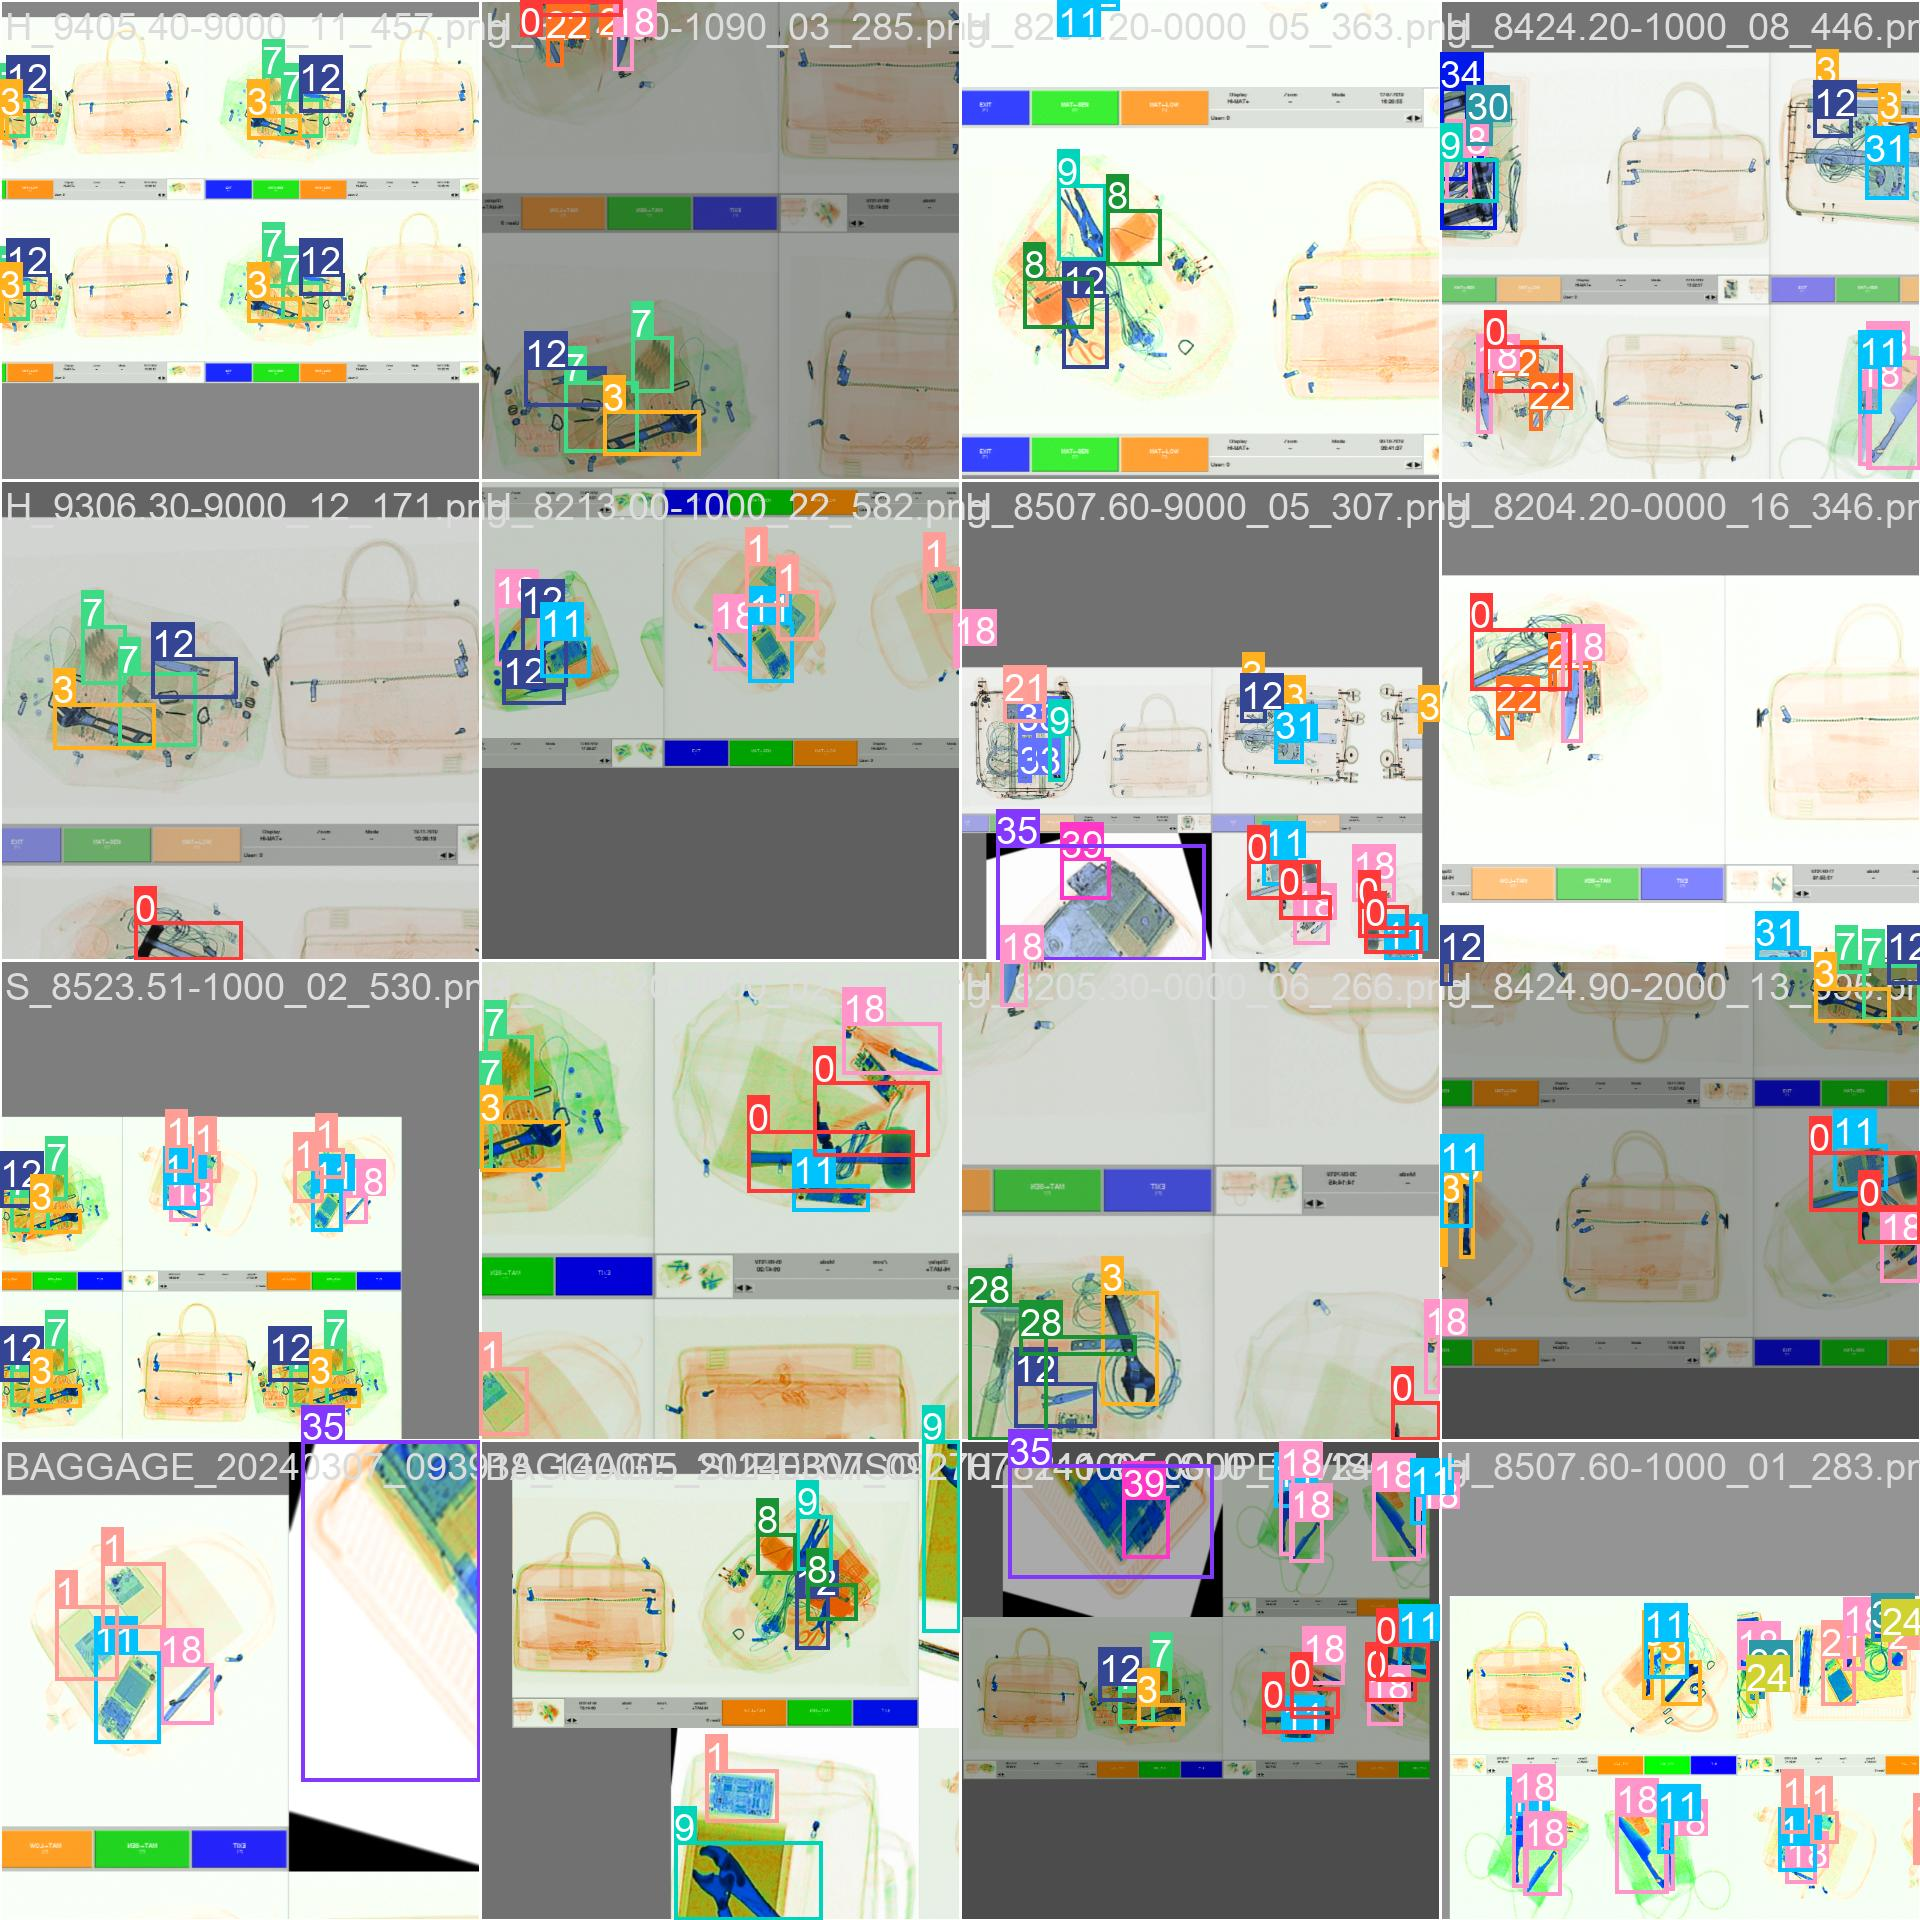

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch0.jpg', width=600)

In [22]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=./dataset_aws.yaml

/home/ec2-user/SageMaker
Ultralytics YOLOv8.0.196 🚀 Python-3.10.14 torch-2.1.0 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25864078 parameters, 0 gradients, 78.8 GFLOPs
val: Scanning /home/ec2-user/SageMaker/aws_data/aws_dataset/val.cache... 546 ima
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        546       3040      0.948      0.918       0.95      0.853
                Hammer        546        129          1      0.977      0.995      0.951
                   SSD        546         91      0.964      0.876      0.924      0.811
               Alcohol        546          6          1      0.919      0.995      0.878
               Spanner        546        136      0.967      0.993      0.995      0.963
                   Axe        546         81      0.978      0.975      0.993      0.916
                   Awl        546         32      0.883      0.944      0.919      0.725
        Throwing Knife     

In [23]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/home/ec2-user/SageMaker/aws_data/aws_dataset/test/ save=True save_txt=True

/home/ec2-user/SageMaker
Ultralytics YOLOv8.0.196 🚀 Python-3.10.14 torch-2.1.0 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25864078 parameters, 0 gradients, 78.8 GFLOPs

image 1/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/2024032609093515_aug2.png: 384x640 4 SSDs, 7 USBs, 4 Cameras, 2 Camcorders, 75.5ms
image 2/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/2024032609122018_aug16.png: 384x640 5 SSDs, 8 USBs, 5 Cameras, 3 Camcorders, 2 SD Cards, 11.1ms
image 3/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/2024032609163462_aug17.png: 384x640 4 SSDs, 3 USBs, 4 Cameras, 11.0ms
image 4/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/BAGGAGE_20240221_090445_140005_0_A_aug2.jpg: 640x384 1 SSD, 1 HDD, 1 Laptop, 73.2ms
image 5/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/BAGGAGE_20240221_090445_140005_0_A_aug7.jpg: 640x384 1 HDD, 1 Laptop, 10.9ms
image 6/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/BAGGAGE_20240221_090822

image 54/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/BAGGAGE_20240229_155426_140005_SUPERVISOR_A_aug16.jpg: 640x384 1 SSD, 1 Smart Phone, 1 Tablet PC, 4 USBs, 1 HDD, 2 Cameras, 1 Camcorder, 1 SD Card, 11.2ms
image 55/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/BAGGAGE_20240229_155647_140005_SUPERVISOR_A_aug15.jpg: 640x480 1 SSD, 1 Tablet PC, 4 USBs, 1 HDD, 3 Cameras, 1 Camcorder, 2 SD Cards, 13.3ms
image 56/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/BAGGAGE_20240229_160531_140005_0_A_aug11.jpg: 640x384 1 SSD, 1 Smart Phone, 1 Tablet PC, 2 USBs, 1 HDD, 1 Camera, 1 Camcorder, 2 SD Cards, 11.6ms
image 57/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/BAGGAGE_20240306_104646_140005_SUPERVISOR_A_aug10.jpg: 640x480 2 SSDs, 3 USBs, 3 SD Cards, 13.3ms
image 58/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/BAGGAGE_20240306_104646_140005_SUPERVISOR_A_aug12.jpg: 640x480 2 SSDs, 3 USBs, 5 SD Cards, 12.7ms
image 59/530 /home/ec2-user/SageMaker/aws_

image 109/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8201.40-0000_06_426.png: 416x640 5 Axes, 3 Smart Phones, 2 Scissorss, 3 Lighters, 11.9ms
image 110/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8201.40-0000_07_412.png: 416x640 5 Axes, 2 Smart Phones, 11.8ms
image 111/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8201.40-0000_08_376.png: 416x640 4 Axes, 2 Smart Phones, 2 Lighters, 11.8ms
image 112/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8201.40-0000_08_383.png: 416x640 4 Axes, 2 Smart Phones, 2 Lighters, 11.8ms
image 113/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8201.40-0000_09_409.png: 416x640 5 Axes, 2 Smart Phones, 11.8ms
image 114/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8201.40-0000_11_410.png: 416x640 5 Axes, 2 Smart Phones, 11.8ms
image 115/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8201.40-0000_12_381.png: 416x640 4 Axes, 2 Smart Phones, 2 Lighters, 11.8ms
image 116/530 /home/ec

image 168/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8204.20-0000_12_306.png: 416x640 2 Spanners, 1 Smart Phone, 1 Scissors, 1 Knife, 11.8ms
image 169/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8204.20-0000_16_355.png: 416x640 2 Spanners, 1 Smart Phone, 1 Lighter, 11.8ms
image 170/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8204.20-0000_17_269.png: 416x640 2 Spanners, 1 Smart Phone, 1 Scissors, 1 Knife, 1 Chisel, 11.8ms
image 171/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8204.20-0000_17_286.png: 416x640 2 Spanners, 1 Smart Phone, 1 Lighter, 11.7ms
image 172/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8204.20-0000_17_296.png: 416x640 2 Spanners, 1 Lighter, 1 HDD, 11.7ms
image 173/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8204.20-0000_17_306.png: 416x640 2 Spanners, 1 Scissors, 1 Knife, 1 Screwdriver, 11.7ms
image 174/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8204.20-0000_19_342.png: 416x64

image 225/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8205.40-0000_14_334.png: 416x640 1 Spanner, 1 Knife, 2 Screwdrivers, 11.8ms
image 226/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8205.40-0000_17_334.png: 416x640 1 Spanner, 1 Knife, 2 Screwdrivers, 11.8ms
image 227/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8205.40-0000_19_343.png: 416x640 1 Scissors, 2 Screwdrivers, 11.8ms
image 228/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8205.40-0000_19_351.png: 416x640 1 Scissors, 3 Screwdrivers, 11.8ms
image 229/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8205.40-0000_23_355.png: 416x640 1 Spanner, 1 Scissors, 2 Knifes, 2 Screwdrivers, 11.8ms
image 230/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8207.50-1090_01_097.png: 416x640 2 Awls, 1 Knife, 1 HDD, 11.8ms
image 231/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8207.50-1090_03_121.png: 416x640 2 Awls, 1 Smart Phone, 1 Lighter, 11.8ms
image 232/530 /h

image 283/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8213.00-1000_13_561.png: 416x640 4 Scissorss, 2 Lighters, 2 HDDs, 11.8ms
image 284/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8213.00-1000_13_566.png: 416x640 2 Smart Phones, 4 Scissorss, 2 Knifes, 11.8ms
image 285/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8213.00-1000_15_489.png: 416x640 2 Smart Phones, 4 Scissorss, 2 Knifes, 11.7ms
image 286/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8213.00-1000_16_542.png: 416x640 2 Smart Phones, 4 Scissorss, 2 Knifes, 11.7ms
image 287/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8213.00-1000_18_560.png: 416x640 2 Smart Phones, 4 Scissorss, 2 Knifes, 11.8ms
image 288/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8213.00-1000_22_476.png: 416x640 4 Scissorss, 2 Lighters, 3 HDDs, 11.8ms
image 289/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8213.00-1000_26_462.png: 416x640 2 Smart Phones, 4 Scissorss, 2 Light

image 341/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8424.90-2000_16_377.png: 416x640 1 Hammer, 2 Gun Partss, 1 Screwdriver, 11.8ms
image 342/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8424.90-2000_18_423.png: 416x640 1 Spanner, 1 Scissors, 2 Gun Partss, 11.8ms
image 343/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8424.90-2000_18_475.png: 416x640 1 Spanner, 2 Gun Partss, 1 Screwdriver, 11.8ms
image 344/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8424.90-2000_19_408.png: 416x640 1 Hammer, 1 Scissors, 2 Gun Partss, 11.7ms
image 345/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8424.90-2000_20_399.png: 416x640 1 Hammer, 1 Scissors, 2 Gun Partss, 11.7ms
image 346/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8424.90-2000_20_403.png: 416x640 1 Hammer, 1 Scissors, 2 Gun Partss, 11.8ms
image 347/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_8424.90-2000_20_415.png: 416x640 1 Spanner, 2 Gun Partss, 1 Screwdr

image 395/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_9306.30-9000_10_158.png: 416x640 1 Hammer, 1 Scissors, 2 Bullets, 11.8ms
image 396/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_9306.30-9000_11_182.png: 416x640 1 Axe, 1 Supplymentary Battery, 2 Bullets, 11.8ms
image 397/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_9306.30-9000_12_442.png: 416x640 1 Axe, 1 Supplymentary Battery, 2 Bullets, 11.8ms
image 398/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_9306.30-9000_13_442.png: 416x640 1 Spanner, 1 Scissors, 2 Bullets, 11.7ms
image 399/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_9306.30-9000_14_184.png: 416x640 1 Hammer, 2 Bullets, 1 Screwdriver, 11.7ms
image 400/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_9306.30-9000_15_180.png: 416x640 1 Spanner, 1 Scissors, 2 Bullets, 11.9ms
image 401/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_93307.90-9000_02_271.png: 416x640 2 Scissorss, 4 Liquids, 11.9ms
ima

image 451/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_9506.91-0000_06_243.png: 416x640 2 Bats, 1 Screwdriver, 1 Gun, 11.8ms
image 452/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_9506.91-0000_06_303.png: 416x640 2 Bats, 1 Gun, 1 Saw, 11.7ms
image 453/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_9506.91-0000_08_259.png: 416x640 2 Hammers, 2 Bats, 1 Gun, 11.8ms
image 454/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_9613.80-0000_01_606.png: 416x640 2 Smart Phones, 2 Scissorss, 3 Lighters, 11.8ms
image 455/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_9613.80-0000_02_589.png: 416x640 2 Smart Phones, 2 Scissorss, 3 Lighters, 12.0ms
image 456/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_9613.80-0000_04_369.png: 416x640 2 Smart Phones, 2 Scissorss, 4 Lighters, 11.9ms
image 457/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/H_9613.80-0000_04_607.png: 416x640 2 Knifes, 3 USBs, 5 Lighters, 3 HDDs, 11.9ms
image 458/53

image 507/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/S_8517.70-1029_14_411.png: 416x640 4 Smart Phones, 4 Scissorss, 11.8ms
image 508/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/S_8517.70-1029_14_467.png: 416x640 4 Smart Phones, 2 Knifes, 2 Batterys, 11.8ms
image 509/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/S_8523.51-1000_04_528.png: 416x640 6 SSDs, 2 Smart Phones, 3 Knifes, 11.8ms
image 510/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/S_8523.51-1000_06_502.png: 416x640 4 SSDs, 4 Smart Phones, 2 Knifes, 11.8ms
image 511/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/S_8523.51-1000_06_504.png: 416x640 4 SSDs, 4 Smart Phones, 2 Knifes, 11.9ms
image 512/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/S_8523.51-1000_09_488.png: 416x640 4 SSDs, 2 Smart Phones, 3 Knifes, 11.9ms
image 513/530 /home/ec2-user/SageMaker/aws_data/aws_dataset/test/S_8523.51-1000_10_489.png: 416x640 4 SSDs, 4 Smart Phones, 11.8ms
image 514/530 /home/ec2-

In [24]:
import os
from ultralytics import YOLO

test_images_path = "/home/ec2-user/SageMaker/aws_data/aws_dataset/test"
predict_results_path = "/home/ec2-user/SageMaker/runs/detect/predict2
model = YOLO("/home/ec2-user/SageMaker/runs/detect/train/weights/best.pt")

test_image_files = [file for file in os.listdir(test_images_path) if file.endswith(".png")]

total_match_count = 0
total_image_count = len(test_image_files)
class_match_counts = {}

# class ID와 class 명의 매핑 정보
class_names = ['Hammer','SSD','Alcohol','Spanner','Axe','Awl','Throwing Knife','Firecracker','Thinner','Plier','Match',
               'Smart Phone','Scissors','Tablet PC','Solid Fuel','Bat','Portable Gas','Nail Clippers','Knife','Metal Pipe',
               'Electronic Cigarettes(Liquid)','Supplymentary Battery','Bullet','Gun Parts','USB','Liquid','Aerosol','Screwdriver',
               'Chisel','Handcuffs','Lighter','HDD','Electronic Cigarettes','Battery','Gun','Laptop','Saw','Zippo Oil','Stun Gun',
               'Camera','Camcorder','SD Card']

for image_file in test_image_files:
    image_path = os.path.join(test_images_path, image_file)
    label_path = os.path.join(test_images_path, image_file[:-4] + ".txt")
    
    with open(label_path, "r") as f:
        actual_labels = f.read().splitlines()
    
    actual_class_ids = [int(float(label.split()[0])) for label in actual_labels]
    
    results = model.predict(source=image_path, save=False, save_txt=False)
    
    predict_result_path = os.path.join(predict_results_path, "labels", image_file[:-4] + ".txt")

    with open(predict_result_path, "r") as f:
        predicted_labels = f.read().splitlines()
    
    predicted_class_ids = [int(float(label.split()[0])) for label in predicted_labels]

    print(f"Image: {image_file}")
    print("Actual Class IDs:")
    print([f"{class_id} ({class_names[class_id]})" for class_id in actual_class_ids])
    print("Predicted Class IDs:")
    print([f"{class_id} ({class_names[class_id]})" for class_id in predicted_class_ids])

    match_count = len(set(actual_class_ids) & set(predicted_class_ids))
    total_count = len(set(actual_class_ids) | set(predicted_class_ids))
    match_percentage = match_count / total_count * 100

    print(f"Match Percentage: {match_percentage:.2f}%")

    if set(actual_class_ids) == set(predicted_class_ids):
        print("Class IDs match!")
        total_match_count += 1
    else:
        print("Class IDs do not match.")

    for class_id in set(actual_class_ids + predicted_class_ids):
        if class_id not in class_match_counts:
            class_match_counts[class_id] = [0, 0]  # [match_count, total_count]
        
        if class_id in actual_class_ids and class_id in predicted_class_ids:
            class_match_counts[class_id][0] += 1
        
        class_match_counts[class_id][1] += 1
    
    print("---")

total_match_percentage = total_match_count / total_image_count * 100
print(f"Total Match Percentage: {total_match_percentage:.2f}%")

class_match_percentages = []
for class_id, (match_count, total_count) in class_match_counts.items():
    match_percentage = match_count / total_count * 100
    class_match_percentages.append((class_id, match_percentage))

class_match_percentages.sort(key=lambda x: x[1])

print("Class IDs with the lowest match percentages:")
for class_id, match_percentage in class_match_percentages[:10]:
    class_name = class_names[class_id]
    print(f"Class ID: {class_id} ({class_name}), Match Percentage: {match_percentage:.2f}%")

SyntaxError: unterminated string literal (detected at line 5) (3352847861.py, line 5)

In [15]:
import os
import glob

test_path = "/home/ec2-user/SageMaker/aws_data/aws_dataset/test"
predict_path = "/home/ec2-user/SageMaker/runs/detect/predict2"
class_names = ['Hammer','SSD','Alcohol','Spanner','Axe','Awl','Throwing Knife','Firecracker','Thinner','Plier','Match',
               'Smart Phone','Scissors','Tablet PC','Solid Fuel','Bat','Portable Gas','Nail Clippers','Knife','Metal Pipe',
               'Electronic Cigarettes(Liquid)','Supplymentary Battery','Bullet','Gun Parts','USB','Liquid','Aerosol','Screwdriver',
               'Chisel','Handcuffs','Lighter','HDD','Electronic Cigarettes','Battery','Gun','Laptop','Saw','Zippo Oil','Stun Gun',
               'Camera','Camcorder','SD Card']

# 클래스별 통계 정보 초기화
test_class_stats = {class_name: {"Images": 0, "Instances": 0} for class_name in class_names}
predict_class_stats = {class_name: {"Images": 0, "Instances": 0} for class_name in class_names}

# 테스트 이미지 파일 목록 가져오기
test_image_files = glob.glob(os.path.join(test_path, "*.png"))
predict_image_files = glob.glob(os.path.join(predict_path, "*.png"))

# 테스트 데이터셋 통계 계산
for image_file in test_image_files:
    label_file = image_file[:-4] + ".txt"
    
    with open(label_file, "r") as f:
        labels = f.read().splitlines()
    
    for label in labels:
        class_id, _, _, _, _ = label.split()
        class_id = int(float(class_id))
        class_name = class_names[class_id]
        
        test_class_stats[class_name]["Images"] += 1
        test_class_stats[class_name]["Instances"] += 1

# 예측 결과 데이터셋 통계 계산
for image_file in predict_image_files:
    label_file = os.path.join(predict_path, "labels", os.path.basename(image_file)[:-4] + ".txt")
    
    with open(label_file, "r") as f:
        labels = f.read().splitlines()
    
    for label in labels:
        class_id, _, _, _, _ = label.split()
        class_id = int(float(class_id))
        class_name = class_names[class_id]
        
        predict_class_stats[class_name]["Images"] += 1
        predict_class_stats[class_name]["Instances"] += 1

# 결과 출력
print("Class\t\t\tTest Images\tTest Instances\tPredict Images\tPredict Instances\tTest Instances/Predict Instances")
for class_name in class_names:
    test_images = test_class_stats[class_name]["Images"]
    test_instances = test_class_stats[class_name]["Instances"]
    predict_images = predict_class_stats[class_name]["Images"]
    predict_instances = predict_class_stats[class_name]["Instances"]
    
    # Test Instances/Predict Instances 비율 계산
    if predict_instances > 0:
        instance_ratio = test_instances / predict_instances
    else:
        instance_ratio = float('inf')
    
    print(f"{class_name[:15]:<15}\t{test_images:>10}\t{test_instances:>13}\t{predict_images:>13}\t{predict_instances:>16}\t{instance_ratio:.2f}")

Class			Test Images	Test Instances	Predict Images	Predict Instances	Test Instances/Predict Instances
Hammer         	       119	          119	          121	             121	0.98
SSD            	        34	           34	           34	              34	1.00
Alcohol        	         2	            2	            4	               4	0.50
Spanner        	       121	          121	          141	             141	0.86
Axe            	        77	           77	           88	              88	0.88
Awl            	        32	           32	           33	              33	0.97
Throwing Knife 	         4	            4	            4	               4	1.00
Firecracker    	        56	           56	           68	              68	0.82
Thinner        	         6	            6	            9	               9	0.67
Plier          	        27	           27	           32	              32	0.84
Match          	        12	           12	           11	              11	1.09
Smart Phone    	       269	          269	          2